# Movie Genre Classification

#### Movie genre classification is a fundamental task in the domain of natural language processing (NLP) and machine learning. It involves categorizing movies into predefined genres based on textual information such as synopses, reviews, or metadata. Accurate genre classification can enhance movie recommendation systems, improve search functionality, and aid in organizing large movie databases.

In [1]:
# Pandas: A library for data manipulation and analysis, providing data structures like DataFrames.
import pandas as pd

# Seaborn: A visualization library based on Matplotlib, offering a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

# Matplotlib: A plotting library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# NumPy: A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices.
import numpy as np

# nltk: The Natural Language Toolkit, a suite of libraries and programs for symbolic and statistical natural language processing.
import nltk

# re: A module for regular expression operations, allowing for sophisticated string matching and manipulation.
import re 

# stopwords: A list of common words that are usually filtered out in text processing.
from nltk.corpus import stopwords

# word_tokenize: A function to split text into individual words or tokens.
from nltk.tokenize import word_tokenize

# WordNetLemmatizer: A lemmatizer that uses WordNet to reduce words to their base or root form.
from nltk.stem import WordNetLemmatizer

# train_test_split: A function to split the dataset into training and testing sets.
# GridSearchCV: A function to perform hyperparameter optimization by cross-validation.
from sklearn.model_selection import train_test_split, GridSearchCV

# TfidfVectorizer: A tool to convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# LogisticRegression: A machine learning model for binary classification tasks.
from sklearn.linear_model import LogisticRegression

# classification_report: A function to generate a report showing the main classification metrics.
from sklearn.metrics import classification_report

In [2]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Set of English stopwords
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase to ensure uniformity
    text = text.lower()

    # Remove punctuation using regular expressions
    # The pattern [^\w\s] matches any character that is not a word character or whitespace
    text = re.sub(r'[^\w\s]', '', text)

    # Remove specific characters: #, @, and $
    # These characters are often used in social media and are not needed for most text processing tasks
    text = re.sub(r'[#@\$]', '', text)

    # Tokenize the text into individual words
    # Tokenization is the process of splitting the text into words or tokens
    tokens = word_tokenize(text)

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each token to reduce it to its base or dictionary form
    text = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stopwords from the token list
    # Stopwords are common words that are often removed in text processing to reduce noise
    text = [word for word in text if word not in stopword]

    # Join the list of tokens back into a single string
    return " ".join(text)

In [4]:
# Read training data
train_df = pd.read_csv("train_data.txt", sep=':::', header=None, engine='python')
train_df.columns = ['Id','Title','Genre','Description']

In [5]:
# Display the first 5 rows of the DataFrame 'train_df' to get a quick overview of the data
train_df.head()

Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [6]:
# Get the unique genres from the 'Genre' column in the 'train_df' DataFrame
categories = train_df.Genre.unique()

# Print the number of unique genres
print(len(categories))

# Display the list of unique genres
categories

27


array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

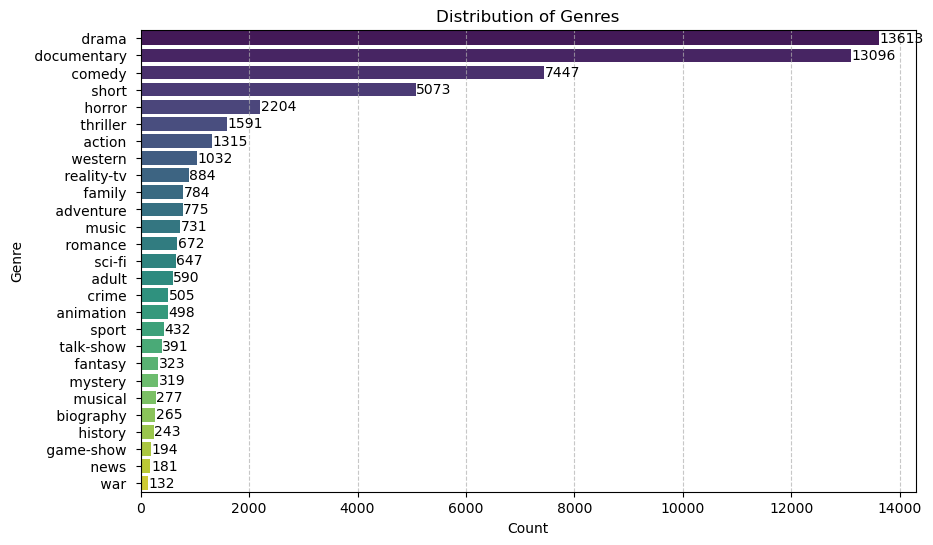

In [7]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using seaborn's barplot function
# Counting the occurrences of each genre and ordering them by count
sns.barplot(y=train_df['Genre'].value_counts().index, x=train_df['Genre'].value_counts(), palette='viridis')

# Add title and axis labels
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels to each bar
for i, count in enumerate(train_df['Genre'].value_counts()):
    plt.text(count + 10, i, str(count), va='center')

# Display the plot
plt.show()

In [8]:
# Preprocess description and add it to the dataframe
train_df["Description_clean"] = train_df["Description"].apply(preprocessing)

In [9]:
# Display the first few rows of the DataFrame train_df
train_df.head()

Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                   Description_clean  
0  listening conversation doctor parent 10yearold...  
1  brother sister past incestuous relationship cu...  
2  bus empty student field trip museum natural hi...  
3  help unemployed father make end meet edith twi...  
4  film title refers unrecovered body ground zero...

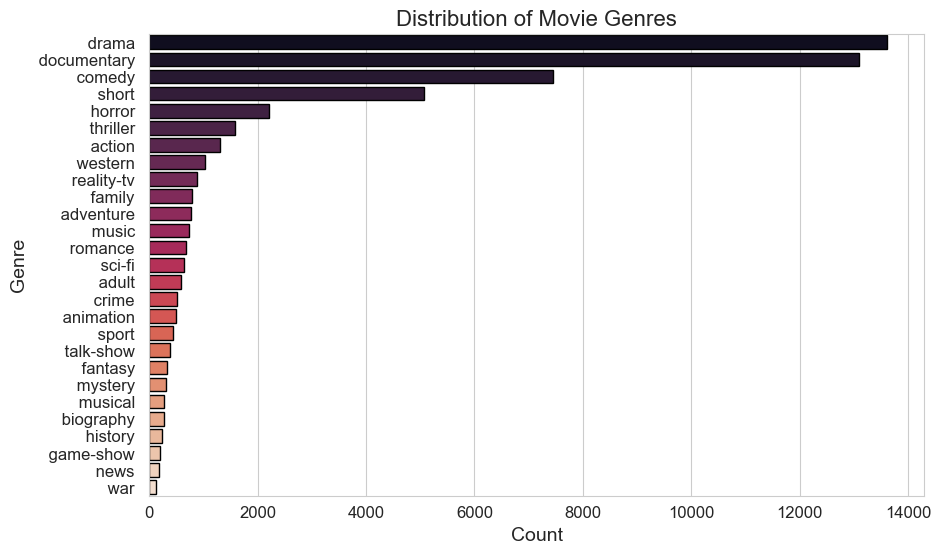

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Count the occurrences of each genre
genre_counts = train_df['Genre'].value_counts()

# Create a bar plot with a different color palette and edge color
sns.barplot(x=genre_counts, y=genre_counts.index, palette='rocket', edgecolor='black')

# Set title and labels with adjusted font sizes
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Adjust ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

In [11]:
# Drop unnecessary columns from the dataframe
data = train_df.drop(["Title", "Id", "Description"], axis=1)

In [12]:
# Display the first few rows of the DataFrame
data.head()

Genre                                  Description_clean
0      drama   listening conversation doctor parent 10yearold...
1   thriller   brother sister past incestuous relationship cu...
2      adult   bus empty student field trip museum natural hi...
3      drama   help unemployed father make end meet edith twi...
4      drama   film title refers unrecovered body ground zero...

In [13]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])

In [14]:
# Display the first few rows of the DataFrame
data.head()

Genre                                  Description_clean  \
0      drama   listening conversation doctor parent 10yearold...   
1   thriller   brother sister past incestuous relationship cu...   
2      adult   bus empty student field trip museum natural hi...   
3      drama   help unemployed father make end meet edith twi...   
4      drama   film title refers unrecovered body ground zero...   

   Genre_encoded  
0              8  
1             24  
2              1  
3              8  
4              8

In [15]:
# Split data into features (X) and target variable (y)
X = data['Description_clean']
y = data['Genre_encoded']

In [16]:
# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(X)

In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # for Logistic Regression
}

In [19]:
# Initialize GridSearchCV for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1)

In [20]:
# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [21]:
# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1}
Best Score: 0.5768600720693662


In [22]:
# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
print("Model Score on Test data:", best_model.score(X_test, y_test))

Model Score on Test data: 0.5787143779396846


In [23]:
# Predict on test set and print classification report
y_pred_best = best_model.predict(X_test)
genre_names = list(label_encoder.classes_)
print("Classification Report:\n", classification_report(y_test, y_pred_best, target_names=genre_names))

Classification Report:
                precision    recall  f1-score   support

      action        0.51      0.26      0.34       263
       adult        0.78      0.19      0.30       112
   adventure        0.44      0.17      0.24       139
   animation        0.53      0.10      0.16       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.59      0.55      1443
       crime        0.33      0.03      0.05       107
 documentary        0.67      0.83      0.75      2659
       drama        0.54      0.78      0.64      2697
      family        0.42      0.09      0.15       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.95      0.45      0.61        40
     history        0.00      0.00      0.00        45
      horror        0.64      0.56      0.59       431
       music        0.65      0.52      0.58       144
     musical        0.25      0.02      0.04        50
     mystery        1.00      0.02      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


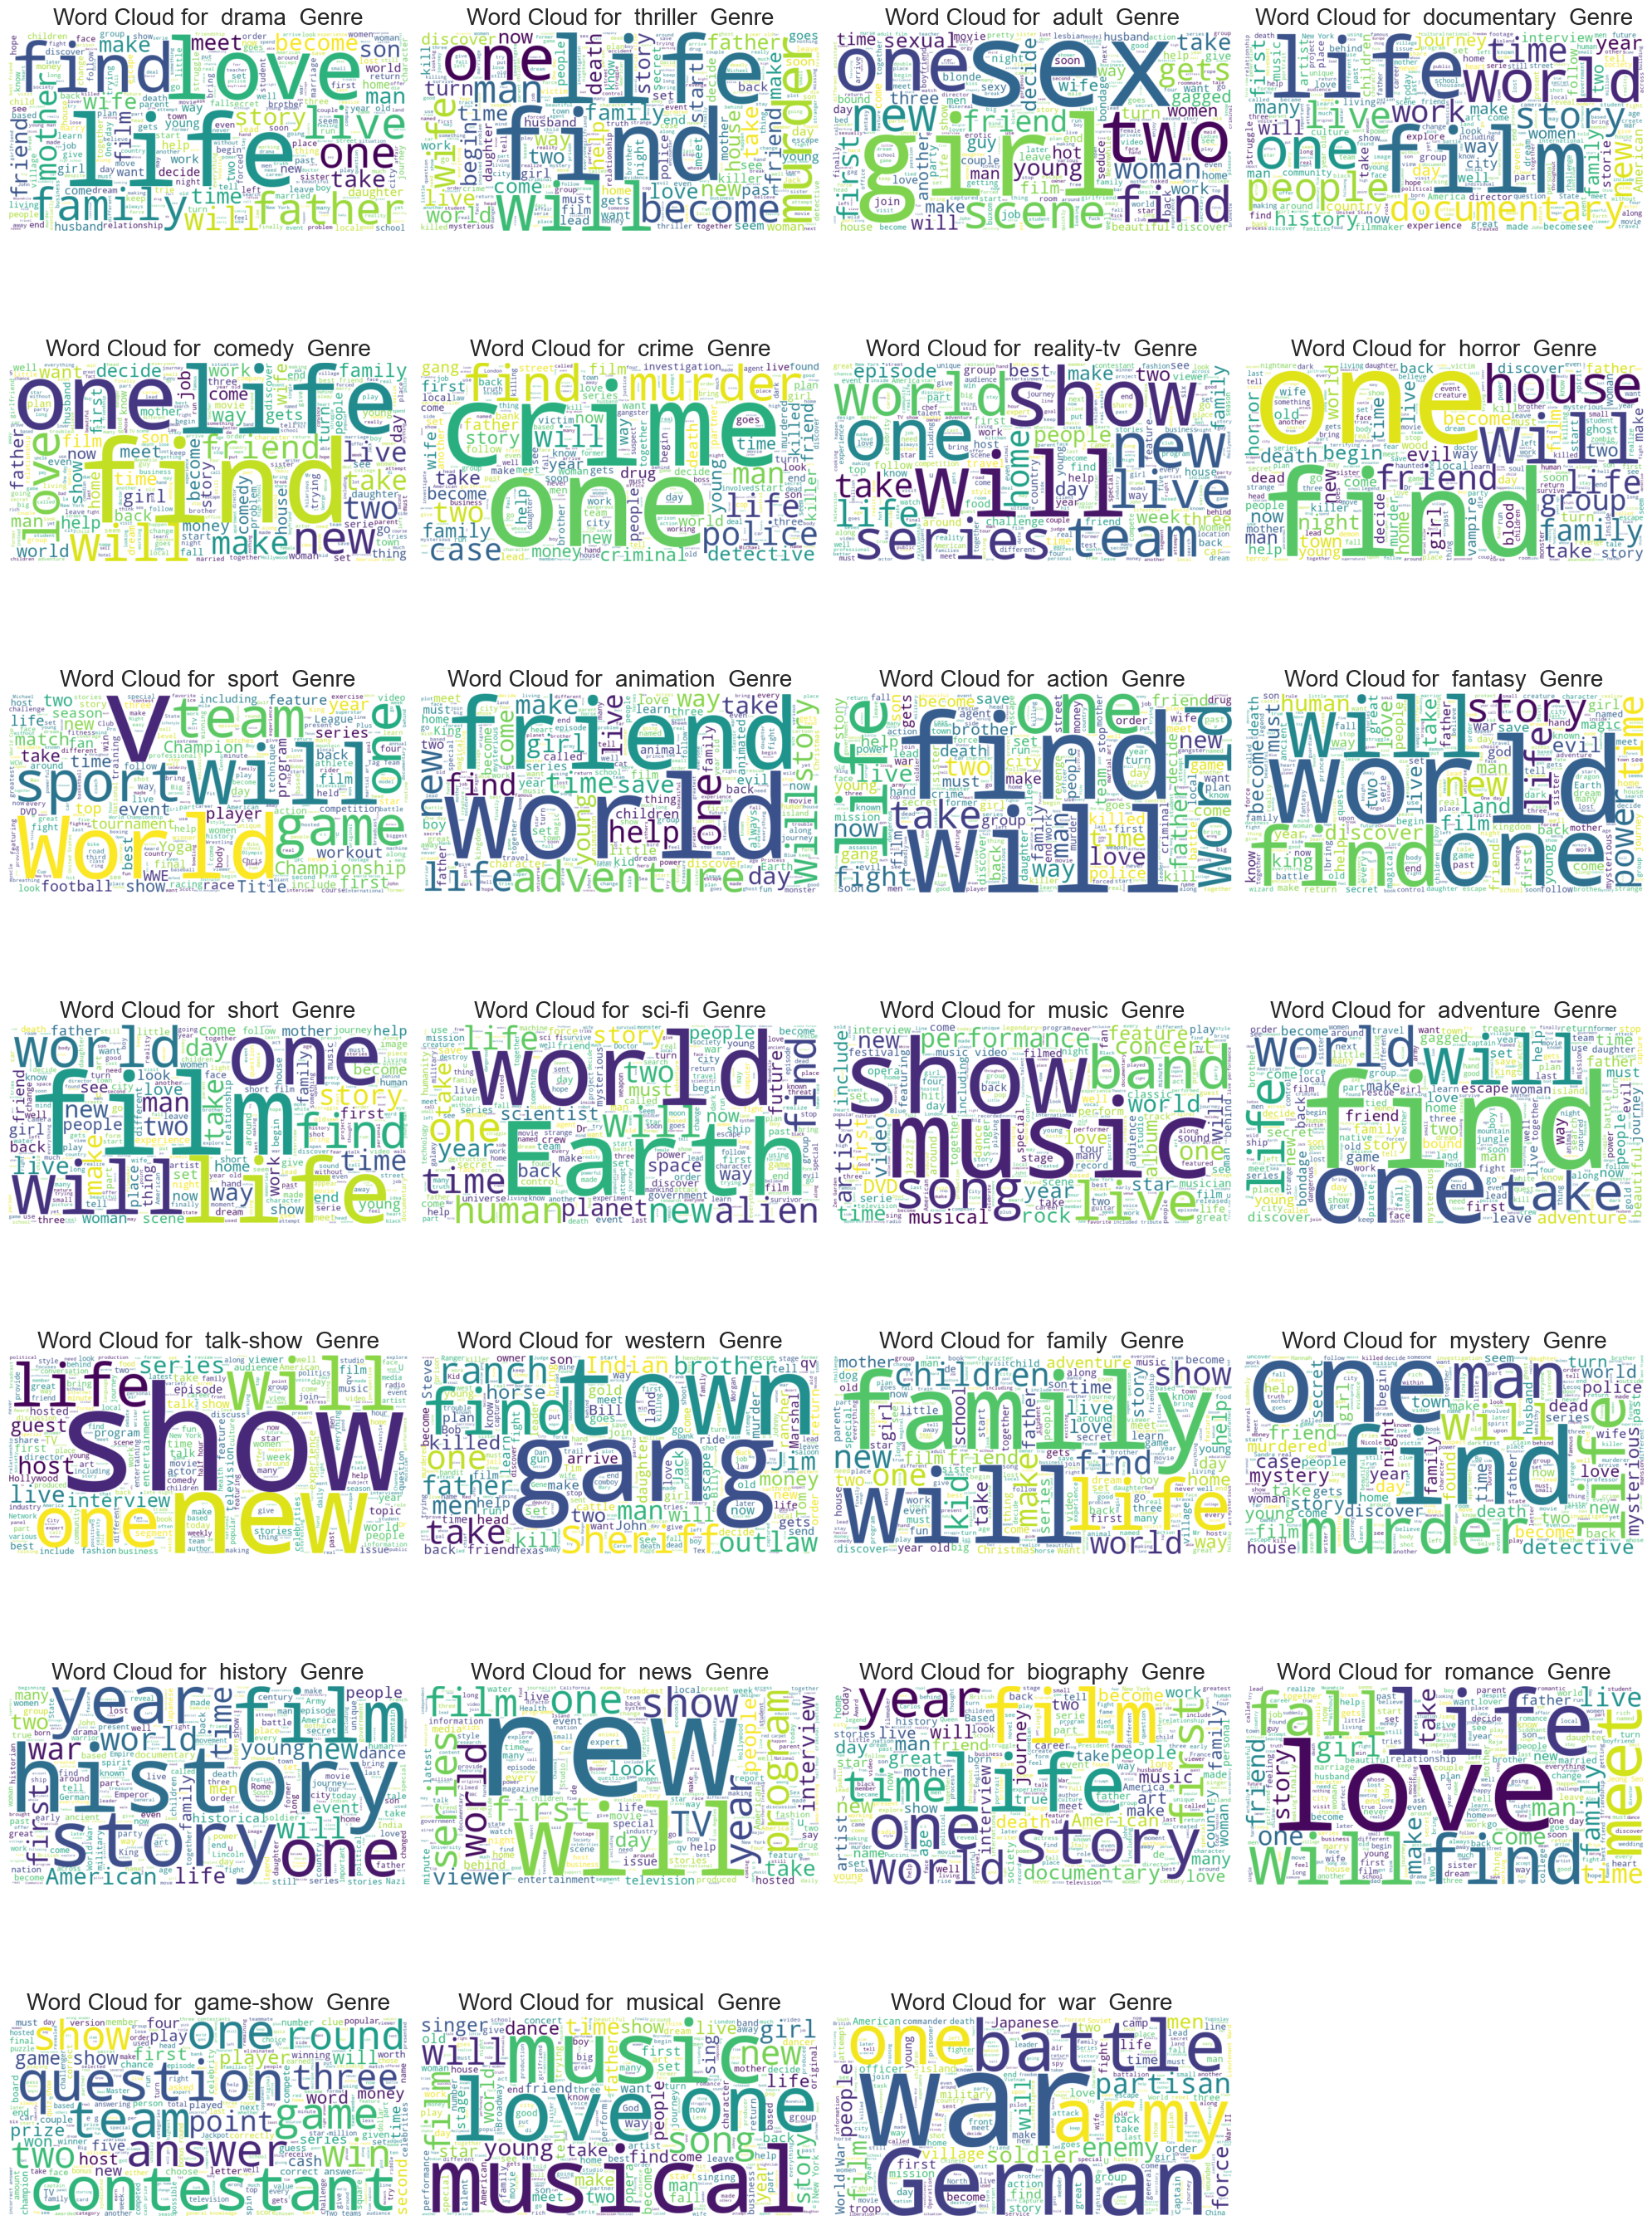

In [25]:
from wordcloud import WordCloud

# Create a list of unique genres from the dataset
genres = train_df['Genre'].unique()

# Set the figure size outside the loop
plt.figure(figsize=(20, 40))

# Iterate over each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(10, 4, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(train_df[train_df["Genre"] == genre]['Description'])
    wordcloud = WordCloud(max_words=300, width=800, height=400, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre', fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

## End

## Made By :- Manav Malhotra

### GitHub Link :- https://github.com/Manav173